# NestedHyperLine (0.0.5): Usage

## Introduction

This is a guide on how to use NestedHyperLine. NestedHyperLine is a Python implementation of Nested Cross Validation for Bayesian Optimized Linear Regularization. It begins with instructions regarding installation, dependencies, and data. After, the application of Nested Cross Validation for Bayesian Optimized Linear Regularization is demonstrated. The outline of this guide is below.

1. Installation
2. Dependencies
3. Data
4. Nested Cross Validation for Bayesian Optimized Linear Regularization
5. Results
6. Plots
7. Conclusion
8. References

## 1. Installation

First, we install NestedHyperLine from the Github repository. Alternatively, we could install from the official Python Package Index (PyPI) distribution. However, the developer version is utilized here for the latest release.

In [6]:
## install pypi release
# !pip install smogn

## install developer version
!pip install git+https://github.com/nickkunz/nestedhyperline.git@dev

## 2. Dependencies

Next, we load the required dependencies. Here we import `regressors` from `nestedhyperline` to later apply Nested Cross Validation for Bayesian Optimized Linear Regularization. In addition, we use `pandas` for data handling, and `sklearn` for sample data.

In [18]:
## load dependencies
from nestedhyperline import regressors
from sklearn import datasets
import pandas

## 3. Data

After, we load the data. In this example, we use the Boston Housing Dataset from `sklearn` originally complied by David Harrison, Jr. and Daniel Rubinfeld. In this case, we simply name our dataset, `housing`.

In [19]:
## load data
housing_sklearn = datasets.load_boston()
housing = pandas.DataFrame(housing_sklearn.data, columns = housing_sklearn.feature_names)
housing['target'] = pandas.Series(housing_sklearn.target)

## 4. Nested Cross Validation for Bayesian Optimized Linear Regularization

Here we cover the focus of this example. We call the `ridge_ncv_regressor` function from `regressors` (`regressors.ridge_ncv_regressor`) and satisfy all of the available arguments:  `data`, `y`, `loss`, `k_inner`, `k_outer`, `n_evals`, `random_state`, `standardize`, and `verbose`.

* The `data` argument takes a Pandas DataFrame, which contains the dataset. In this example, we input the previously loaded `housing` dataset with follow input: `data = housing`

* The `y` argument takes a string, which specifies the reponse variable by header name. In this example, we input `'target'` in the interest of predicting the median value of owner-occupied housing in $1000's in Boston, Massachusetts by utilizing the following input: `y = 'target'`

* The `loss` argument takes a string, which specifies the applied loss function. NestedHyperLine supports the following loss functions as inputs: `"explained variance"` (alias: `"ev"`) `"max error"` (alias: `"me"`), `"mean absolute error"` (alias: `"mae"`), `"mean squared error"` (alias: `"mse"`), `"root mean squared error"` (alias: `"rmse"`), `"median absolute error"` (alias: `"mdae"`), `"r2"`, `"mean poisson deviance"` (alias: `"mpd"`), `"mean gamma deviance"` (alias: `"mgd"`). In this example, we apply the `"mean absolute error"` loss function with the following input: `loss = 'mae'` 

* The `k_inner` argument takes a positive integer greater than 1 and less than 20. `k_inner` specifies the number of _inner folds_ applied in Nested K-Fold Cross-Validation. Values between `3` and `10` are recommended. The Inner K-Fold is utilized for training and validation set splitting in the Bayesian Optimization step. In this example, we input `10` Inner K-Folds (default is `5`) with the following input: `k_inner = 10`

* The `k_outer` argument takes a positive integer greater than 1 and less than 20. `k_outer` specifies the number of _outer folds_ applied in Nested K-Fold Cross-Validation. Values between `3` and `10` are recommended. The Outer K-Fold is utilized for test set splitting in the testing step. In this example, we input `10` Outer K-Folds (default is `5`) with the following input: `k_outer = 10`

* The `random_state` argument takes an arbitrary positive integer. `random_state` specifies a single fixed random state applied for reproducibility. The same as found in other implementations where fixed random states or a "seed" is applied. In this example, we input an arbitrary number `1` (default is random positive integer between 0 and 9999) with the following input `random_state = 1`

* The `standardize` argument takes a boolean value. `standardize` specifies whether or not to standardize all variables to include both the `y` reponse variable, as well as all explanatory variables. Note that the results are also returned standardized. It is highly recommended that standardization is applied! In this example, we standardize the dataset with the following input: `standardize = True`

* The `verbose` argument takes a boolean value. `verbose` specifies whether or not to output feedback while training-validation and testing. The output is in the form one progress bar per each Outer K-Fold. Meaning, each progress bars represents one completed test. In this example, we elect to display the training-validation and testing with the following input: `verbose = True`

In [20]:
## conduct nestedhyperboost
results = regressors.ridge_ncv_regressor(
    data = housing,
    y = 'target',
    loss = 'mae',
    k_inner = 10,
    k_outer = 10,
    n_evals = 1000,
    random_state = 1,
    standardize = True,
    verbose = True
)

100%|██████████| 1000/1000 [00:41<00:00, 24.24trial/s, best loss: 0.5876613365166294]


## 5. Results

After conducting Nested Cross Validation for Bayesian Optimized Linear Regularization, we briefly examine the prediction errors. We can calculate the Mean Absolute Error (MAE) of the all _k_ number of test set errors by calling the dot operator followed by `error_mean()`. This works with any legal loss function.

Also, we round the average prediction errors by specifying the `n_digits` argument with the number of desired decimals places. In this example, we round the MAE `4` decimal places (default is `6`) with the following input: `n_digits = 4`

Recall that both the prediction errors, as well as the coefficients are reported as standardized. For non-standardized results, remember to specify `regressors.ridge_ncv_regressor()` with the following input: `standardize = False`.

In [21]:
## preview predict error (mae)
results.error_mean(
    ndigits = 4
)

0.422

## 6. Plots

Not only can we view the average prediction errors across all Outer K-Folds with the `results` object, but we can also visualize the performance of the model. NestedHyperLine has built-in visualization tools to help better interpret the underlying learning processes. The following four plots are available as a part of this package.

1. Bayesian Optimization
2. Test Set Errors
3. Linear Regularization
4. Coefficients

In all of the plots, each color represents a different Outer K-Fold. The dotted black line represents the minimum average Inner K-Fold training-validation errors in the Bayesian Optimization step. The solid black line represents the minimum average Outer K-Fold test error. 

Typically, the dotted black line and the solid black line should be as close as possible. It means that the prediction errors observed in training-validation set are generally consistent with the prediction errors observed in the test set.

In other words, the model's prediction error outcomes were as expected. The further the distance between the minimum average training-validation error (dotted black line) as the minimum average test set error (solid black line) are, the higher the likelihood that the model was either underfit or overfit.

### 6.1 Bayesian Optimization

The plot below exhibits the Bayesian Optimization process. It vizualizes the convergence of the hyper-parameter λ (log scale) over the number of evaluations specified. 

Notice that as the number of evaluations increase, Bayesian Optimization converges and learns the optimial λ, which minimizes the loss function (MAE).

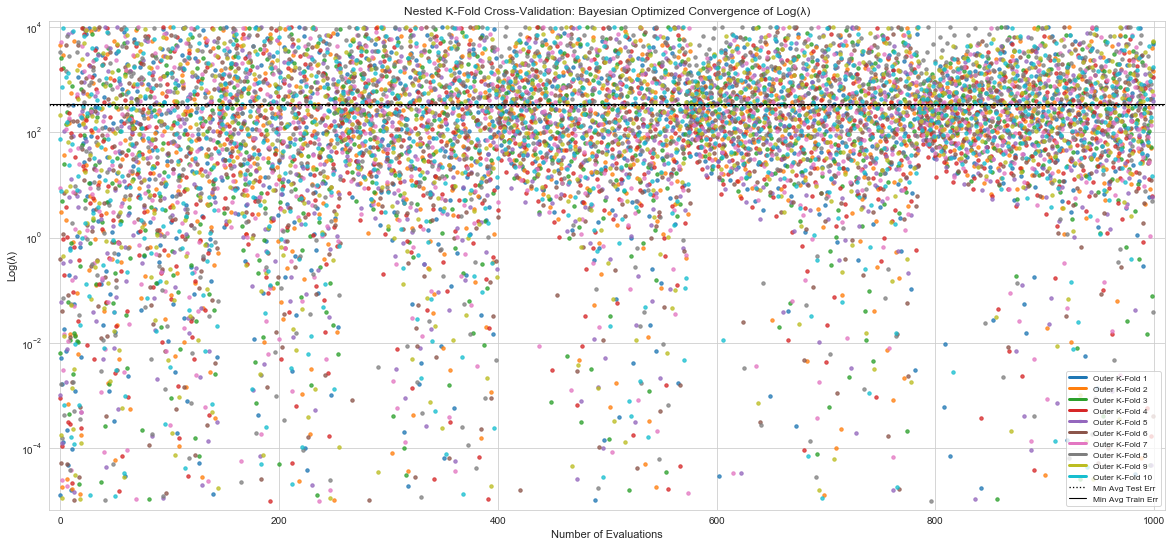

In [22]:
## plot bayesian optimization
results.plot_lambda()

### 6.2 Test Set Errors

The plot below exhibits the test set prediction errors. It vizualizes the affect that the hyper-parameter λ (log scale) has on the prediction errors of the test sets.

Notice the general trend in the regions of the optimal λ, which minimizes the the loss function (MAE). Also notice the higher number of λ's attempted near the minimum MAE, while the number of suboptimal λ's were attempted less.

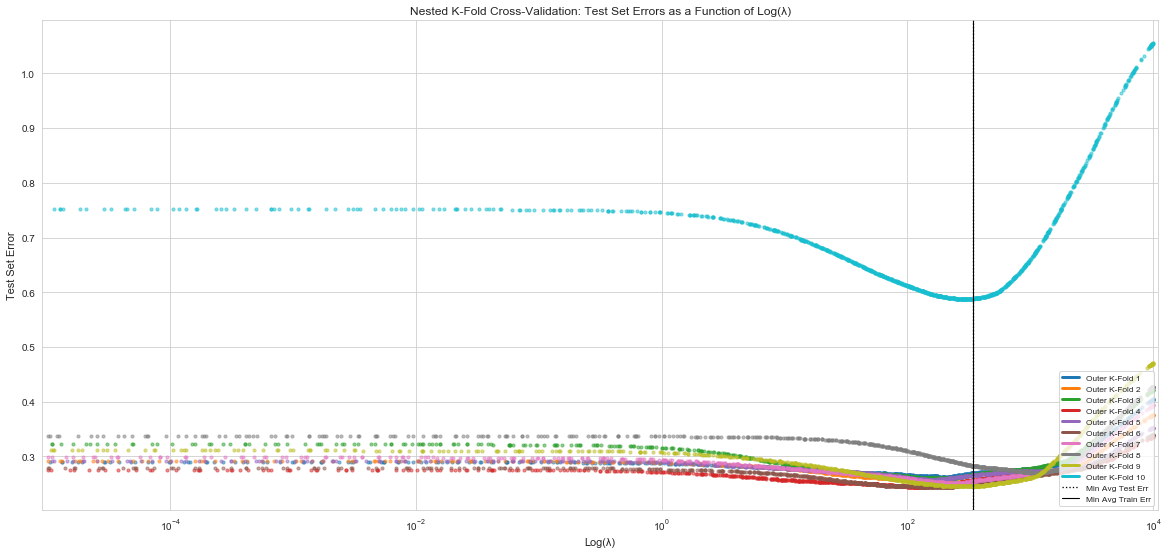

In [23]:
## plot predict errors (mae)
results.plot_error_mean()

### 6.3 Linear Regularization

The plot below exhibits the the Linear Regularization or "shrinkage" of the model's coefficients. It vizualizes the affect that the hyper-parameter λ (log scale) has on the cofficients of the test sets.

Notice that as λ increases, the cofficients begin to "shrink" until near zero. Recall that this example applied Ridge Regression L2 regularization, where coefficients can shrink to near zero, but not exactly zero. 

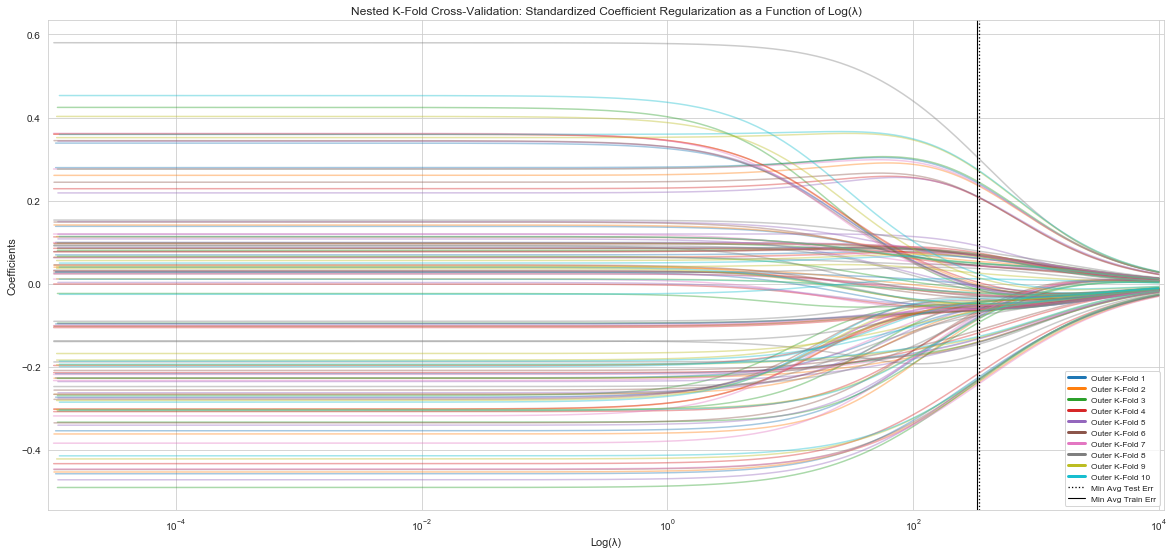

In [24]:
## plot regularization
results.plot_regular()

### 6.4 Coefficients

The plot below exhibits the model's standardized coefficients. It vizualizes the relative importance that each explanatory feature has on the response variable. 

Notice that the model contains both negative and positive standardized coefficients, where their relative importance is based on their distance from zero (1 and -1 are considered the most important).

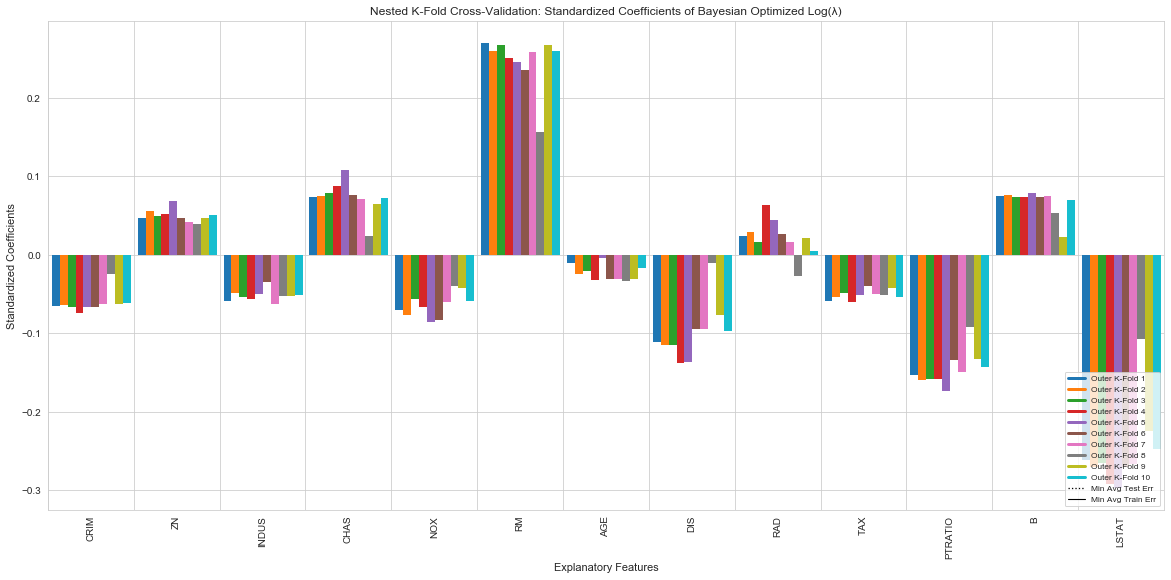

In [25]:
## plot coefficients
results.plot_coef()

## 7. Conclusion

In this example, we covered how to use NestedHyperLine. We utilized the Boston Housing Dataset to conduct Nested Cross Validation for Bayesian Optimized Linear Regularization.

NestedHyperLine predicted the median value of owner-occupied housing in Boston, Massachusetts. The results were briefly examined with the packages easy to use visualization features.

Developer updates are available in the package's Github repository at https://github.com/nickkunz/nestedhyperline. Official releases are available in the Python Package Index (PyPI) and can be found at https://pypi.org/project/nestedhyperline.

NestedHyperLine is open for improvements and maintenance. Your help is valued to make the package better for everyone.

## 8. References

Harrison, D., Rubinfeld, D.L. (1978). Hedonic Prices and the Demand for Clean Air. Journal of Environmental Economics and Management, Elsevier, 5(1):81-102.

Kunz, N. (2020). NestedHyperLine: Nested Cross Validation for Bayesian Optimized Linear Regularization (Version 0.0.5). Python Package Index (PyPI). https://pypi.org/project/smogn.